# Equifax Raw Data

In [1]:
import pyodbc
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os.path

%matplotlib inline

con = pyodbc.connect('DSN=Wongalb')

In [2]:
StartDates = "'2017-11-01 00:00:00'"
CloseDates = "'2018-05-31 00:00:00'"
DaysMature = 8
Category = 0

In [3]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
cwd = os.getcwd()
cwd

'C:\\Users\\gabriel.rosinol\\Desktop\\Python3\\Equifax'

In [9]:
from data.data import data

In [12]:
df = data(StartDates,CloseDates,DaysMature,Category)

In [13]:
try:
    cursor = con.cursor()
    df = pd.read_sql(Query,con, index_col = 'id_pres')
except:
    print('Oops! I seems like you are not connected!')

Oops! I seems like you are not connected!


In [14]:
cat_features = [f for f in df.columns if df[f].dtype == 'object']
for f_ in cat_features:
    df[f_]=pd.to_numeric(df[f_],errors='ignore')
print (df.shape)
df.head(5)

(9875, 39)


,id_soli,Badness7D,Badness30D,creation_date,creation_YM,score_Band,score,InCais,count_transactions,evaluation,...,unpaid_balance_mortgage_balance,unpaid_balance_personal_Loan_balance,unpaid_balance_credit_card_balance,unpaid_balance_telecom_balance,unpaid_balance_other_products_balance,worst_unpaid_balance,worst_situation,number_of_days_in_worst_situation,number_of_creditors_in_asnef,number_of_delinquency_days
id_pres,,,,,,,,,,,,,,,,,,,,,
1261415,360437,0,0.0,2017-11-01,201711,850 - 900,884,0,NaN,A,...,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0
1261425,327967,0,0.0,2017-11-01,201711,700 - 750,722,0,NaN,C,...,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0
1261441,359954,0,0.0,2017-11-01,201711,750 - 800,783,0,NaN,C,...,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0
1261481,338889,1,1.0,2017-11-01,201711,700 - 750,746,0,NaN,C,...,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0
1261483,360450,0,0.0,2017-11-01,201711,800 - 850,847,0,NaN,B,...,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0


In [15]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [16]:
missing_data(df).head(7)

,Total,Percent
original_request_id,9103,92.182278
worst_situation,7242,73.336709
severity,5228,52.941772
Badness30D,1100,11.139241
date_request,772,7.817722
count_transactions,325,3.291139
number_of_delinquency_days,16,0.162025


In [17]:
df_clean = df[(df.evaluation!='-') & (np.isfinite(df['count_transactions'])) & 
              (np.isfinite(df['total_unpaid_balance']))].drop(['Badness30D','original_request_id'],axis=1)
missing_data(df_clean).head(5)

,Total,Percent
worst_situation,6995,91.342387
severity,5063,66.113868
date_request,738,9.636981
number_of_delinquency_days,0,0.000000
evaluation,0,0.000000


In [18]:
# df_clean[ (df_clean.count_transactions.isnull()) & (df_clean.original_request_id!=np.NaN) ].groupby(['creation_date']).size()

In [19]:
features = df_clean.columns
features

Index(['id_soli', 'Badness7D', 'creation_date', 'creation_YM', 'score_Band',
       'score', 'InCais', 'count_transactions', 'evaluation', 'severity',
       'igm', 'error', 'created_at', 'updated_at', 'date_request',
       'communication_packet_hash', 'total_number_of_operations',
       'total_number_of_consumer_credit_operations',
       'total_number_of_mortgage_operations',
       'total_number_of_personal_loan_operations',
       'total_number_of_credit_card_operations',
       'total_number_of_telecom_operations',
       'total_number_of_other_unpaid_operations', 'total_unpaid_balance',
       'total_unpaid_balance_own_entity',
       'total_unpaid_balance_of_other_entities',
       'unpaid_balance_consumer_credit_balance',
       'unpaid_balance_mortgage_balance',
       'unpaid_balance_personal_Loan_balance',
       'unpaid_balance_credit_card_balance', 'unpaid_balance_telecom_balance',
       'unpaid_balance_other_products_balance', 'worst_unpaid_balance',
       'worst_situ

In [20]:
df_clean.describe(percentiles=[.90, .95, .98,.99] ).transpose().round(decimals=0)

,count,mean,std,min,50%,90%,95%,98%,99%,max
id_soli,7658.0,356189.0,68659.0,390.0,374777.0,400406.0,405957.0,409307.0,412246.0,418369.0
Badness7D,7658.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
creation_YM,7658.0,201773.0,43.0,201711.0,201801.0,201804.0,201804.0,201805.0,201805.0,201805.0
score,7658.0,778.0,71.0,640.0,783.0,874.0,895.0,914.0,929.0,984.0
InCais,7658.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
count_transactions,7658.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,3.0,18.0
total_number_of_operations,7658.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,19.0
total_number_of_consumer_credit_operations,7658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
total_number_of_mortgage_operations,7658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
total_number_of_personal_loan_operations,7658.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9.0


In [21]:
Bads = df_clean['Badness7D'].value_counts()

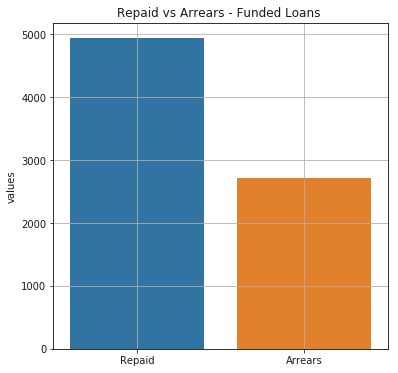

Average arrears rate 7dpd: 35.5%


In [22]:
df_plot = pd.DataFrame({'labels': Bads.index,'values': Bads.values})

plt.figure(figsize = (6,6))

plt.title('Repaid vs Arrears - Funded Loans ')
sns.set_color_codes("pastel")
sns.barplot(x = ['Repaid','Arrears'], y="values", data=df_plot)
locs, labels = plt.xticks()
plt.grid()
plt.show()

print('Average arrears rate 7dpd:','{:.1%}'.format(df_plot.iloc[1,1]/df_plot.values.sum()))

In [23]:
Monthly_Bads = df_clean[['creation_YM','Badness7D']].groupby(['creation_YM']).agg({'count', 'sum'}).reset_index().rename(columns={'sum':'Bads','count':'Total'})
Monthly_Bads['Goods']=Monthly_Bads.Badness7D.Total-Monthly_Bads.Badness7D.Bads
Monthly_Bads['Avg']=Monthly_Bads.Badness7D.Bads/Monthly_Bads.Badness7D.Total
Monthly_Bads.columns = Monthly_Bads.columns.droplevel()
Monthly_Bads.columns = ['creation_YM','Bads','Total','Goods','Avg']
Monthly_Bads = Monthly_Bads[['creation_YM','Bads','Goods','Total','Avg']]
Monthly_Bads

,creation_YM,Bads,Goods,Total,Avg
0,201711,391,859,1250,0.312800
1,201712,485,778,1263,0.384006
2,201801,546,869,1415,0.385866
3,201802,464,782,1246,0.372392
4,201803,509,895,1404,0.362536
5,201804,289,631,920,0.314130
6,201805,34,126,160,0.212500


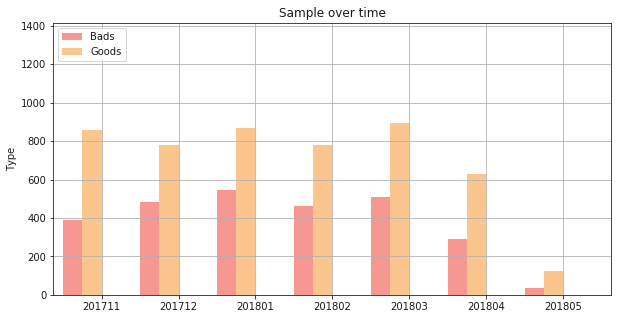

In [24]:
def plot_grouped_bars(df,X_label):
    # Setting the positions and width for the bars
    pos = list(range(len(df['Bads']))) 
    width = 0.25 

    # Plotting the bars
    fig, ax = plt.subplots(figsize=(10,5))

    # Create a bar with pre_score data,
    # in position pos,
    plt.bar(pos, 
            #using df['Bads'] data,
            df['Bads'], 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#EE3224', 
            # with label the first value in first_name
            label=df[X_label][0]) 

    # Create a bar with mid_score data,
    # in position pos + some width buffer,
    plt.bar([p + width for p in pos], 
            #using df['mid_score'] data,
            df['Goods'],
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#F78F1E', 
            # with label the second value in first_name
            label=df[X_label][1]) 

    # Set the y axis label
    ax.set_ylabel('Type')

    # Set the chart's title
    ax.set_title('Sample over time')

    # Set the position of the x ticks
    ax.set_xticks([p + 1.5 * width for p in pos])

    # Set the labels for the x ticks
    ax.set_xticklabels(df[X_label])

    # Setting the x-axis and y-axis limits
    plt.xlim(min(pos)-width, max(pos)+width*4)
    plt.ylim([0, max(df['Bads'] + df['Goods'])] )

    # Adding the legend and showing the plot
    plt.legend(['Bads', 'Goods'], loc='upper left')
    plt.grid()
    plt.show()
    
plot_grouped_bars(Monthly_Bads,'creation_YM')

In [25]:
def plot_stats(df,feature,metric, label_rotation=False, horizontal_layout=True):

    temp = df[feature].value_counts()
    
    df1 = pd.DataFrame({feature: temp.index,'Number of loans': temp.values})

   # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, metric]].groupby([feature],as_index=False).mean()
    
    cat_perc.sort_values(by=feature, ascending=True, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    
    s = sns.barplot(ax=ax1, x = feature, y="Number of loans", order=cat_perc[feature],data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y=metric, order=cat_perc[feature], data=cat_perc)
   
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    plt.ylabel('Arrears rate [%]', fontsize=10)
    
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

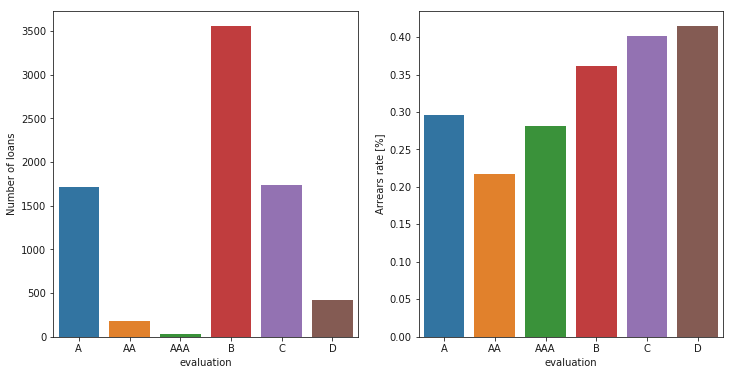

In [26]:
plot_stats(df_clean,'evaluation','Badness7D')

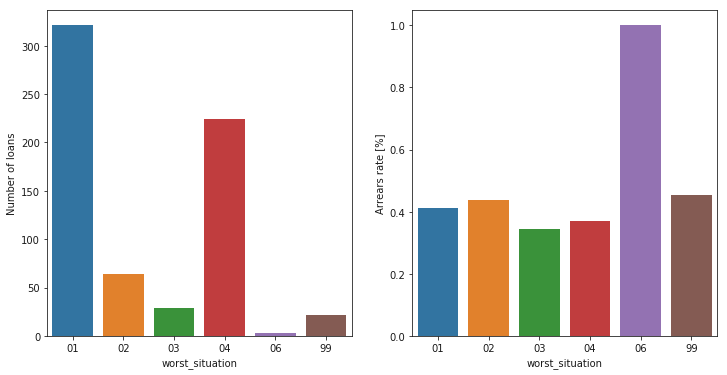

In [27]:
plot_stats(df_clean,'worst_situation','Badness7D')

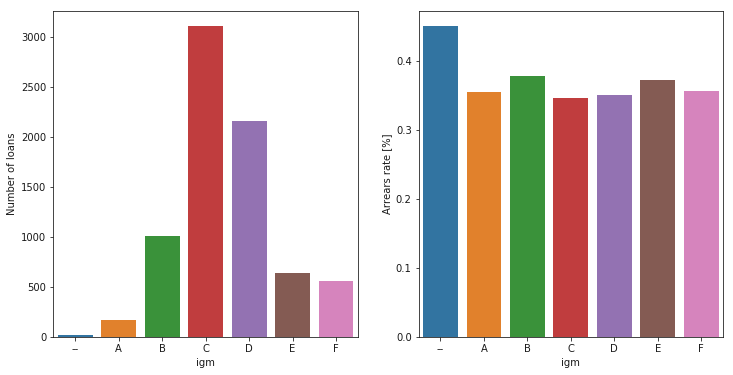

In [28]:
plot_stats(df_clean,'igm','Badness7D')

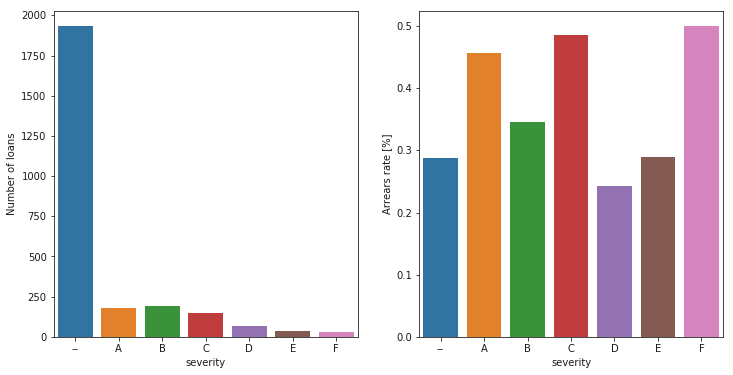

In [29]:
plot_stats(df_clean,'severity','Badness7D') 

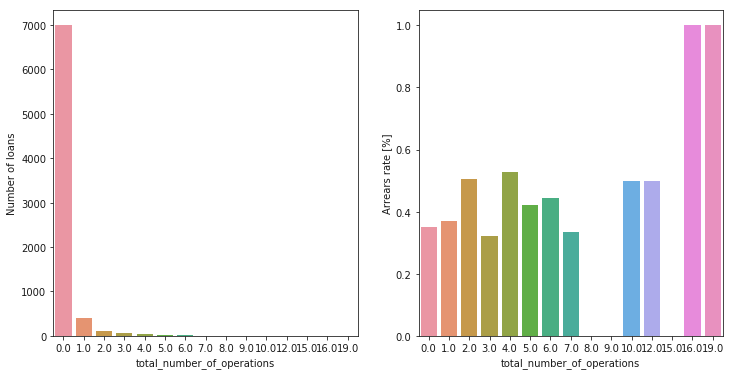

In [30]:
plot_stats(df_clean,'total_number_of_operations','Badness7D') 

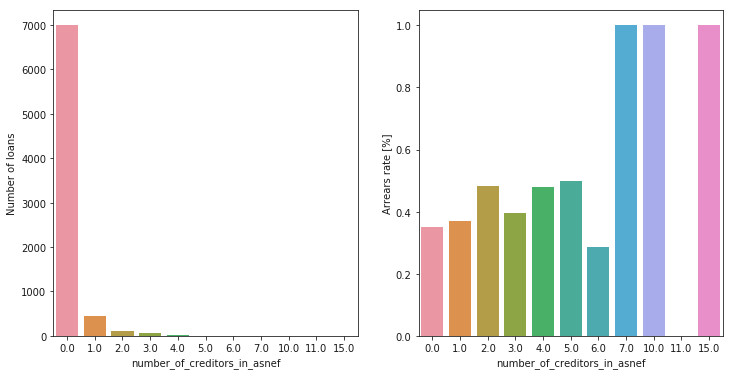

In [31]:
plot_stats(df_clean,'number_of_creditors_in_asnef','Badness7D')
# take into account telcos

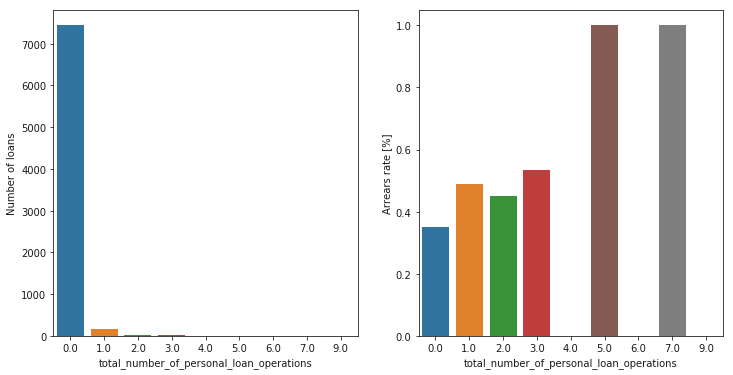

In [32]:
plot_stats(df_clean,'total_number_of_personal_loan_operations','Badness7D') 

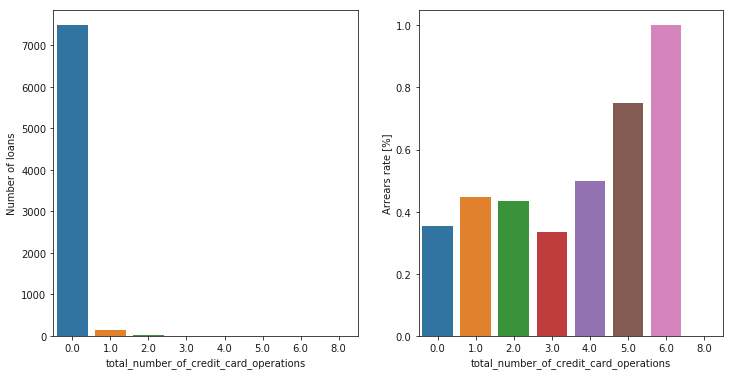

In [36]:
plot_stats(df_clean,'total_number_of_credit_card_operations','Badness7D') 

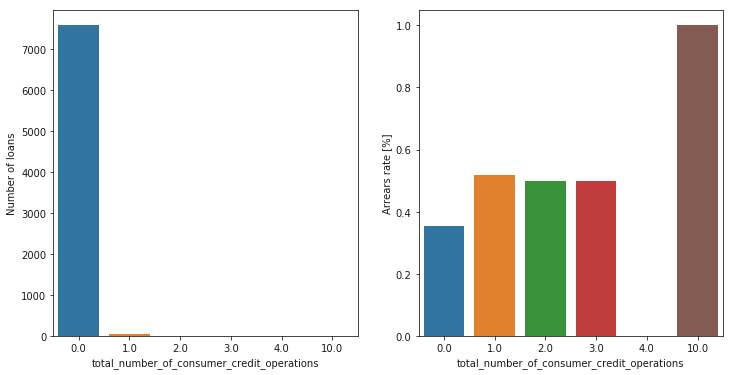

In [37]:
plot_stats(df_clean,'total_number_of_consumer_credit_operations','Badness7D') 